In [2]:
import pandas as pd
from pandas import json_normalize
import requests
from datetime import datetime
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import numpy as np
from matplotlib.patches import FancyArrowPatch

In [3]:
#scegliamo di analizzare la stagione 2015/2016
competition_id = 12
season_id = 27

In [4]:
matches = requests.get("https://raw.githubusercontent.com/statsbomb/open-data/refs/heads/master/data/matches/"+str(competition_id)+"/"+str(season_id)+".json")
matches = matches.json()#ordiniamo le partite cronologicamente

matches_sorted = sorted(matches, key=lambda x: datetime.strptime(x["match_date"], "%Y-%m-%d"))

#focus sulla AS Roma
asroma = "AS Roma"
asroma_matches = []

#visualizziamo le partite della AS Roma e le aggiungiamo ad una nuova lista
for match in matches_sorted:
    if match["home_team"]["home_team_name"] == asroma or match["away_team"]["away_team_name"] == asroma:
        asroma_matches.append(match)
        print(match['home_team']['home_team_name'],"-", match['away_team']['away_team_name'],
          str(match['home_score']) , ":" , str(match['away_score']) , "(match_id: " , str(match['match_id']) , ")")
        
#Trasformo il JSON in un DataFrame con la funzione di Pandas
asroma_df = json_normalize(asroma_matches,sep="_")

# escludo (...) per vedere tutte le colonne del DataFrame
pd.set_option("display.max.columns",None)

Hellas Verona - AS Roma 1 : 1 (match_id:  3878541 )
AS Roma - Juventus 2 : 1 (match_id:  3878555 )
Frosinone - AS Roma 0 : 2 (match_id:  3878593 )
AS Roma - Sassuolo 2 : 2 (match_id:  3878607 )
Sampdoria - AS Roma 2 : 1 (match_id:  3879545 )
AS Roma - Carpi 5 : 1 (match_id:  3879547 )
Palermo - AS Roma 2 : 4 (match_id:  3879564 )
AS Roma - Empoli 3 : 1 (match_id:  3879567 )
Fiorentina - AS Roma 1 : 2 (match_id:  3879583 )
AS Roma - Udinese 3 : 1 (match_id:  3879592 )
Inter Milan - AS Roma 1 : 0 (match_id:  3879598 )
AS Roma - Lazio 2 : 0 (match_id:  3879610 )
Bologna - AS Roma 2 : 2 (match_id:  3879617 )
AS Roma - Atalanta 0 : 2 (match_id:  3879632 )
Torino - AS Roma 1 : 1 (match_id:  3879639 )
Napoli - AS Roma 0 : 0 (match_id:  3879651 )
AS Roma - Genoa 2 : 0 (match_id:  3879657 )
Chievo - AS Roma 3 : 3 (match_id:  3879672 )
AS Roma - AC Milan 1 : 1 (match_id:  3879676 )
AS Roma - Hellas Verona 1 : 1 (match_id:  3879691 )
Juventus - AS Roma 1 : 0 (match_id:  3879701 )
AS Roma - Frosin

In [5]:
# per ogni match id carichiamo in un dizionario gli eventi di ciascun match
asroma_events = {}

match_id_lst = list(asroma_df["match_id"])
match_id_lst

for mtc in match_id_lst:
    events = requests.get("https://raw.githubusercontent.com/statsbomb/open-data/refs/heads/master/data/events/"+str(mtc)+".json")
    events = events.json()
    asroma_events[str(mtc)] = json_normalize(events, sep="_")

In [6]:
# focus sulla prima giornata
match_events = asroma_events["3878555"]
match_events

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,dribble_outcome_id,dribble_outcome_name,pass_outcome_id,pass_outcome_name,pass_cross,pass_switch,ball_receipt_outcome_id,ball_receipt_outcome_name,off_camera,counterpress,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,out,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,clearance_body_part_id,clearance_body_part_name,clearance_right_foot,shot_first_time,pass_aerial_won,interception_outcome_id,interception_outcome_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_won_defensive,ball_recovery_recovery_failure,clearance_head,pass_miscommunication,foul_committed_card_id,foul_committed_card_name,clearance_left_foot,pass_technique_id,pass_technique_name,pass_outswinging,clearance_aerial_won,dribble_nutmeg,pass_inswinging,injury_stoppage_in_chain,foul_committed_offensive,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,block_offensive,foul_committed_type_id,foul_committed_type_name,pass_cut_back,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,shot_aerial_won,pass_goal_assist,shot_saved_off_target,goalkeeper_shot_saved_off_target,foul_committed_advantage,foul_won_advantage,dribble_overrun
0,10e973ea-3671-44f1-b292-1a1b957ddc1e,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,229,AS Roma,1,Regular Play,229,AS Roma,433.0,"[{'player': {'id': 5669, 'name': 'Wojciech Szc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,71b8f01c-7709-4452-9139-bd77d44eb340,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,229,AS Roma,1,Regular Play,224,Juventus,352.0,"[{'player': {'id': 6949, 'name': 'Gianluigi Bu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e4606b50-de3e-40ff-b44f-406f8f073ffe,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,229,AS Roma,1,Regular Play,229,AS Roma,NaN,NaN,[707d77d5-6a71-4c16-82e6-cf6b88cad40d],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,707d77d5-6a71-4c16-82e6-cf6b88cad40d,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,229,AS Roma,1,Regular Play,224,Juventus,NaN,NaN,[e4606b50-de3e-40ff-b44f-406f8f073ffe],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [7]:
# esaminiamo i tiri
asroma_shots = match_events.loc[(match_events["type_name"] == "Shot") & (match_events["team_name"] == asroma)]
asroma_shots

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,dribble_outcome_id,dribble_outcome_name,pass_outcome_id,pass_outcome_name,pass_cross,pass_switch,ball_receipt_outcome_id,ball_receipt_outcome_name,off_camera,counterpress,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,out,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,clearance_body_part_id,clearance_body_part_name,clearance_right_foot,shot_first_time,pass_aerial_won,interception_outcome_id,interception_outcome_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_won_defensive,ball_recovery_recovery_failure,clearance_head,pass_miscommunication,foul_committed_card_id,foul_committed_card_name,clearance_left_foot,pass_technique_id,pass_technique_name,pass_outswinging,clearance_aerial_won,dribble_nutmeg,pass_inswinging,injury_stoppage_in_chain,foul_committed_offensive,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,block_offensive,foul_committed_type_id,foul_committed_type_name,pass_cut_back,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,shot_aerial_won,pass_goal_assist,shot_saved_off_target,goalkeeper_shot_saved_off_target,foul_committed_advantage,foul_won_advantage,dribble_overrun
145,fbd022d6-6e35-478d-98ca-578544b90c3a,146,1,00:02:38.721,2,38,10,0.039365,16,Shot,229,AS Roma,1,Regular Play,229,AS Roma,NaN,NaN,"[1537cdd0-bc15-4302-9c4e-4a90563aa49b, f34c145...","[95.6, 38.4]",20169.0,Seydou Kéita,10.0,Center Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029669,"[97.8, 38.5]",9015c744-eb9c-46a4-ade3-d3f255833f7b,87.0,Open Play,96.0,Blocked,93.0,Normal,38.0,Left Foot,"[{'location': [90.9, 43.3], 'player': {'id': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,ea5b1573-c77d-4e1f-be76-5bb7e3b32c81,257,1,00:04:33.027,4,33,15,0.922474,16,Shot,229,AS Roma,2,From Corner,229,AS Roma,NaN,NaN,[2a79dbbc-40bb-42c4-b869-c112fc6faa62],"[109.1, 28.9]",20169.0,Seydou Kéita,10.0,Center Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096360,"[120.0, 31.5, 0.8]",NaN,87.0,Open Play,98.0,Off T,91.0,Half Volley,38.0,Left Foot,"[{'location': [104.1, 41.7], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,14d10518-7703-433b-b925-2a9d4f7f605b,381,1,00:07:09.209,7,9,18,0.929260,16,Shot,229,AS Roma,4,From Throw In,229,AS Roma,NaN,NaN,[67d550f0-3c6d-40d5-8631-8e458e1975e9],"[101.1, 34.7]",7468.0,Iago Falqué Silva,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105924,"[120.0, 35.0, 3.7]",f695f898-863a-4d9b-b963-6c051e7c5444,87.0,Open Play,98.0,Off T,93.0,Normal,38.0,Left Foot,"[{'location': [10

In [8]:
shots_outcome = asroma_shots["shot_outcome_name"].unique()
outcome_counts = asroma_shots["shot_outcome_name"].value_counts()
outcome_counts

shot_outcome_name
Off T      5
Saved      5
Blocked    3
Wayward    2
Goal       2
Post       1
Name: count, dtype: int64

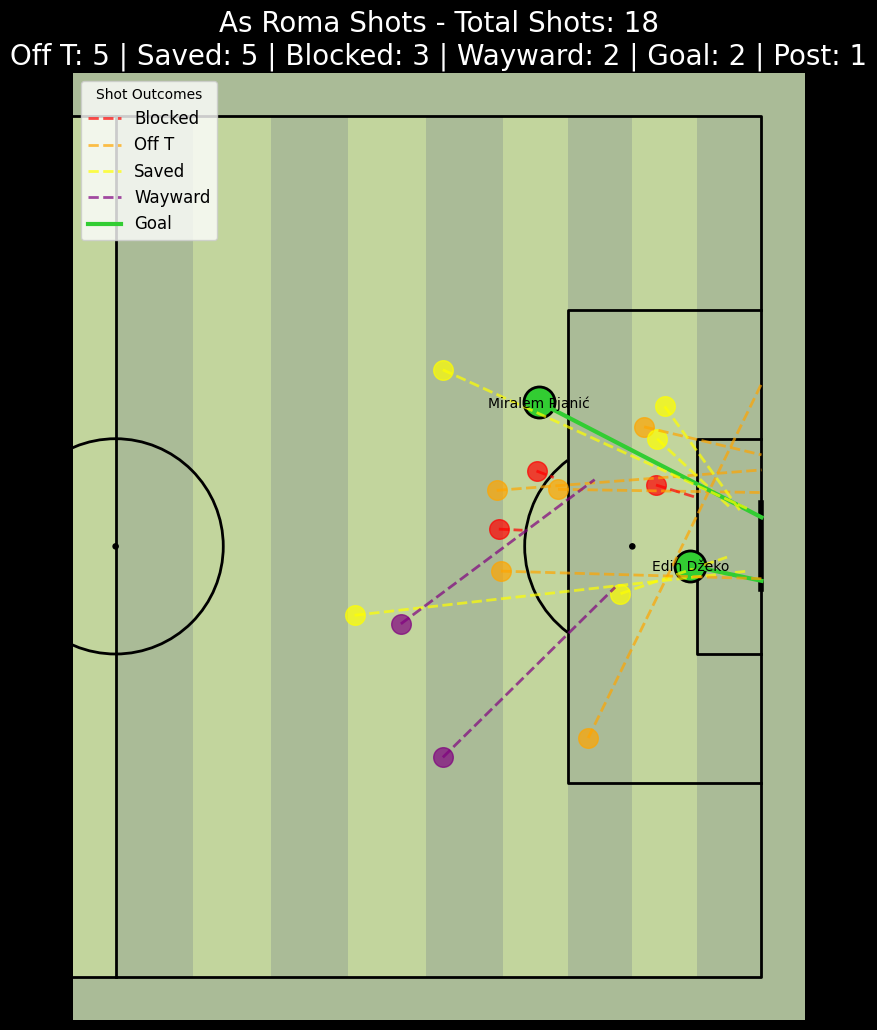

In [9]:
# Calcolare il numero di tiri e gol
total_shots = len(asroma_shots)  # Totale tiri
goals = len(asroma_shots[asroma_shots["shot_outcome_name"] == "Goal"])  # Gol fatti

# Calcolare il numero di tiri per ogni tipo di outcome
outcome_counts = asroma_shots["shot_outcome_name"].value_counts()

# Creazione del grafico
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor("black")
ax.patch.set_facecolor("black")

# Disegnare il campo
#pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True, pitch_length=140, pitch_width=100)

pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True,
                            half=True, pitch_length=100, pitch_width=70)  # Campo metà e verticale
pitch.draw(ax=ax)




# Colori per ogni tipo di tiro sbagliato
missed_outcomes_colors = {
    "Blocked": "red", 
    "Off T": "orange", 
    "Wayward": "purple", 
    "Saved": "yellow",  
    "Saved to Post": "blue"
}

# Linee tratteggiate per i tiri sbagliati
line_style = "--"  # Linea tratteggiata per tutti i tiri sbagliati

# Creare una lista per le etichette della legenda
legend_labels = []
legend_lines = []

# Disegnare i tiri
for x in range(len(asroma_shots["id"])):
    outcome = asroma_shots["shot_outcome_name"].iloc[x]
    if outcome == "Goal":
        # Disegnare la linea del tiro per i gol (linea verde continua, enfatizzata)
        line, = plt.plot(
            (asroma_shots["location"].iloc[x][0], asroma_shots["shot_end_location"].iloc[x][0]),
            (asroma_shots["location"].iloc[x][1], asroma_shots["shot_end_location"].iloc[x][1]),
            color="limegreen", linestyle='-', linewidth=3)  # Spessore aumentato per enfatizzare
        # Cerchio più grande e luminoso per i gol
        plt.scatter(asroma_shots["location"].iloc[x][0], asroma_shots["location"].iloc[x][1], color="limegreen", s=500, edgecolors="black", linewidth=2)

        # Aggiungi il nome del giocatore che ha segnato
        player_name = asroma_shots["player_name"].iloc[x]
        plt.text(asroma_shots["location"].iloc[x][0], asroma_shots["location"].iloc[x][1]+0.5,  # Posizione del testo
                 player_name, color="black", fontsize=10, ha="center")

        # Aggiungere la linea per la legenda (linea verde continua per i gol)
        if "Goal" not in legend_labels:
            legend_labels.append("Goal")
            legend_lines.append(line)

    elif outcome in missed_outcomes_colors:
        # Per i tiri sbagliati, assegniamo il colore e la linea tratteggiata
        color = missed_outcomes_colors[outcome]
        line, = plt.plot(
            (asroma_shots["location"].iloc[x][0], asroma_shots["shot_end_location"].iloc[x][0]),
            (asroma_shots["location"].iloc[x][1], asroma_shots["shot_end_location"].iloc[x][1]),
            color=color, linestyle=line_style, linewidth=2, alpha=0.7)
        plt.scatter(asroma_shots["location"].iloc[x][0], asroma_shots["location"].iloc[x][1], color=color, s=200, alpha=0.7)

        # Aggiungere la linea per la legenda per il tipo di tiro sbagliato
        if outcome not in legend_labels:
            legend_labels.append(outcome)
            legend_lines.append(line)

# Creare la stringa per il titolo con il conteggio di ciascun tipo di tiro
outcome_title = ' | '.join([f"{outcome}: {count}" for outcome, count in outcome_counts.items()])

# Aggiungere il titolo con il numero di tiri e gol, oltre al conteggio per ogni tipo di tiro
plt.title(f"As Roma Shots - Total Shots: {total_shots}\n{outcome_title}", color="white", size=20)

# Aggiungere la legenda con le etichette
plt.legend(legend_lines, legend_labels, loc="upper left", fontsize=12, title="Shot Outcomes")

# Layout e visualizzazione
plt.tight_layout()
plt.show()


In [10]:
asroma_passes = match_events.loc[(match_events["type_name"] == "Pass") & (match_events["team_name"] == asroma)].loc[match_events["pass_type_name"] != "Throw-in"]
asroma_passes

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,dribble_outcome_id,dribble_outcome_name,pass_outcome_id,pass_outcome_name,pass_cross,pass_switch,ball_receipt_outcome_id,ball_receipt_outcome_name,off_camera,counterpress,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,out,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,clearance_body_part_id,clearance_body_part_name,clearance_right_foot,shot_first_time,pass_aerial_won,interception_outcome_id,interception_outcome_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_won_defensive,ball_recovery_recovery_failure,clearance_head,pass_miscommunication,foul_committed_card_id,foul_committed_card_name,clearance_left_foot,pass_technique_id,pass_technique_name,pass_outswinging,clearance_aerial_won,dribble_nutmeg,pass_inswinging,injury_stoppage_in_chain,foul_committed_offensive,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,block_offensive,foul_committed_type_id,foul_committed_type_name,pass_cut_back,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,shot_aerial_won,pass_goal_assist,shot_saved_off_target,goalkeeper_shot_saved_off_target,foul_committed_advantage,foul_won_advantage,dribble_overrun
4,d252b80c-2fc9-4be4-a52e-9c6485bcddff,5,1,00:00:00.248,0,0,2,3.435498,30,Pass,229,AS Roma,9,From Kick Off,229,AS Roma,NaN,NaN,[6a03731b-5e00-4f3f-98bb-00da8c034f6e],"[61.0, 40.1]",6973.0,Edin Džeko,23.0,Center Forward,6962.0,Radja Nainggolan,18.089224,1.238557,1.0,Ground Pass,"[66.9, 57.2]",65.0,Kick Off,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3588ad6e-5201-486c-adb5-e30c93abee8a,8,1,00:00:04.094,0,4,2,0.665288,30,Pass,229,AS Roma,9,From Kick Off,229,AS Roma,NaN,NaN,[81cc1920-da94-4ce9-8112-e5ff26a17353],"[71.9, 68.0]",6962.0,Radja Nainggolan,15.0,Left Center Midfield,6964.0,Alessandro Florenzi,12.050726,0.855870,1.0,Ground Pass,"[79.8, 77.1]",NaN,NaN,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,c7f72648-7e1c-4139-91c7-857c9cfcc1a5,11,1,00:00:05.672,0,5,2,0.965211,30,Pass,229,AS Roma,9,From Kick Off,229,AS Roma,NaN,NaN,[77efcb4d-b908-43ae-8bdc-937bb08ae7e2],"[81.6, 76.2]",6964.0,Alessandro Florenzi,2.0,Right Back,3531.0,Mohamed Salah,10.830050,-2.640772,1.0,Ground Pass,"[72.1, 71.0]",NaN,NaN,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [11]:
asroma_passes["player_name"].value_counts()

player_name
Alessandro Florenzi               72
Lucas Digne                       71
Miralem Pjanić                    68
Daniele De Rossi                  66
Radja Nainggolan                  65
Konstantinos Manolas              55
Seydou Kéita                      54
Iago Falqué Silva                 46
Mohamed Salah                     39
Edin Džeko                        34
Wojciech Szczęsny                 25
Juan Manuel Iturbe Arévalo         2
Segundo Víctor Ibarbo Guerrero     1
Name: count, dtype: int64

In [12]:
# selezioniamo solo le colonne rilevanti
columns = asroma_passes.loc[:,["location","pass_end_location","player_name","pass_outcome_name"]]

# prendiamo la lista di tutti i giocatori che hanno effettuato un passaggio
# conta il numero di passaggi per ciascun giocatore
# players = df['player_name'].unique()
players = columns.groupby(by="player_name").size().sort_values(ascending=False).index.tolist()

columns["pass_outcome_name"].unique()

players

['Alessandro Florenzi',
 'Lucas Digne',
 'Miralem Pjanić',
 'Daniele De Rossi',
 'Radja Nainggolan',
 'Konstantinos Manolas',
 'Seydou Kéita',
 'Iago Falqué Silva',
 'Mohamed Salah',
 'Edin Džeko',
 'Wojciech Szczęsny',
 'Juan Manuel Iturbe Arévalo',
 'Segundo Víctor Ibarbo Guerrero']

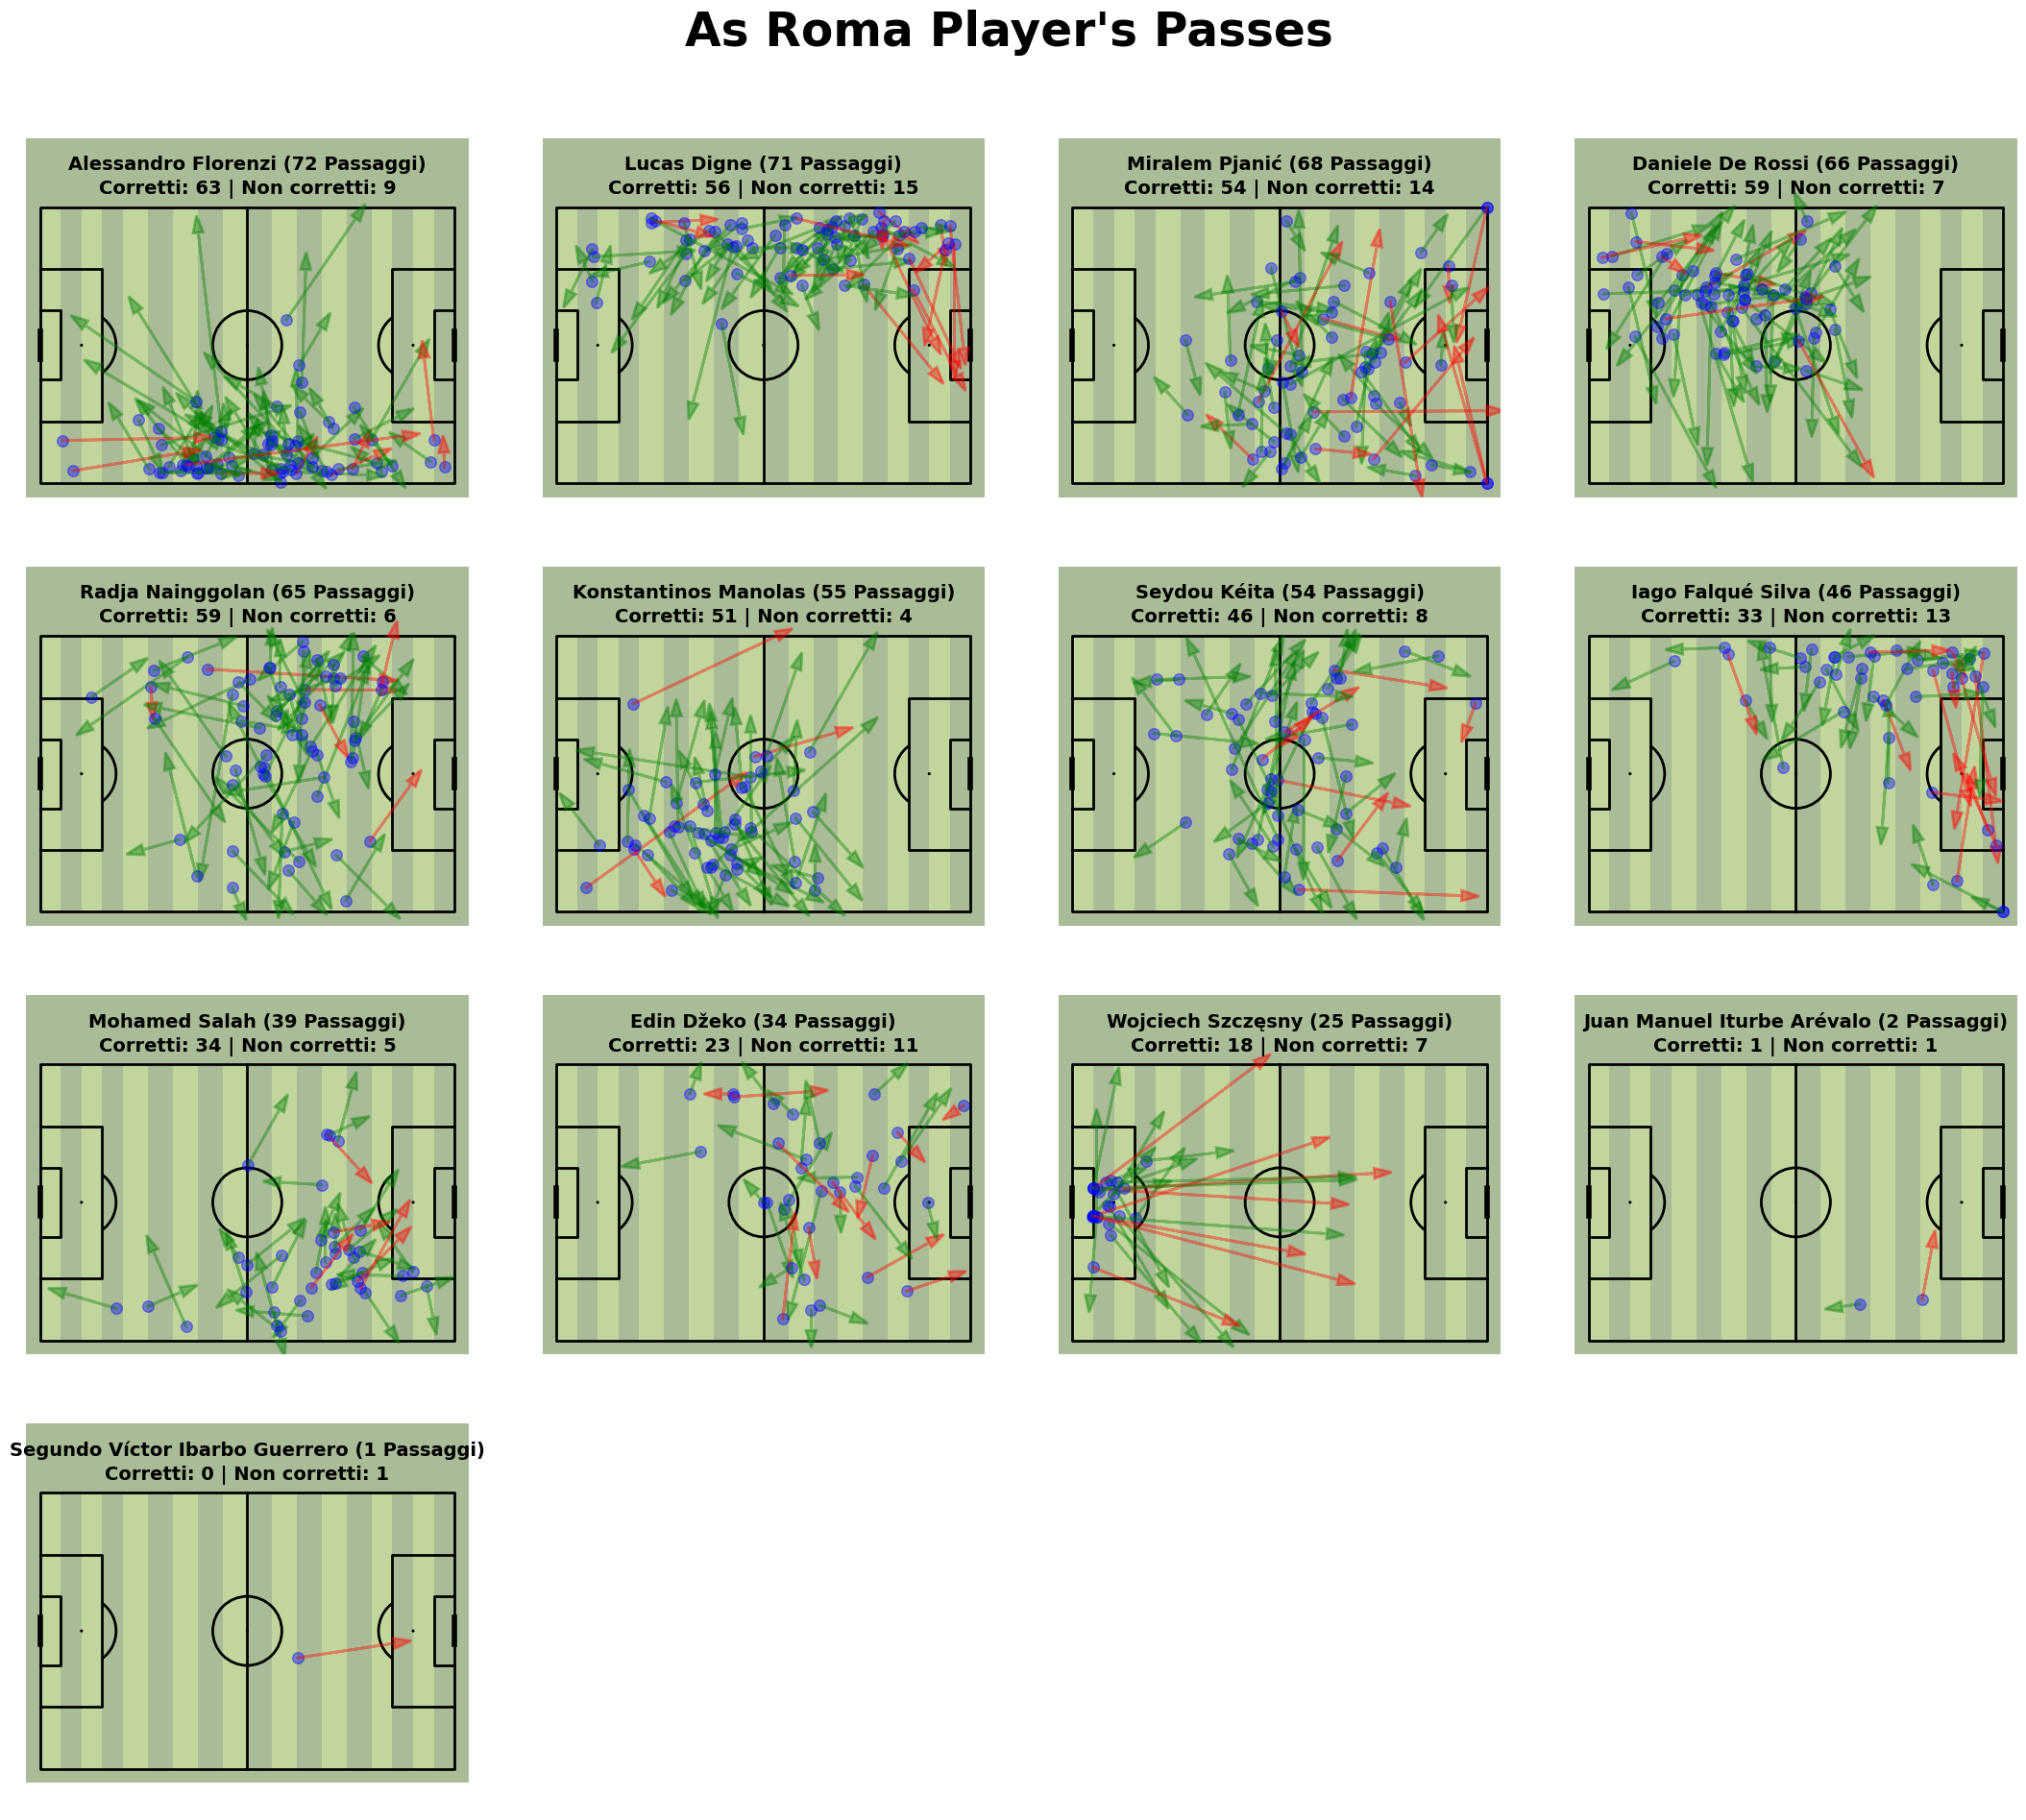

In [13]:
# Crea una figura con 16 sottotrame (4x4)
fig, axs = plt.subplots(figsize=(22, 18), nrows=4, ncols=4)

# Imposta il layout della figura
axs = axs.flatten()  # Rende più facile indicizzare le sottotrame

# Elenco dei passaggi considerati "sbagliati"
invalid_pass_outcomes = ["Incomplete", "Out", "Unknown", "Pass Offside", "Injury Clearance"]

# Disegna un campo da gioco per ciascun giocatore
for i, player in enumerate(players):
    
    # disegna un Pitch all'axs[i]
    pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True, pad_top=20,pitch_length=140, pitch_width=100)
    ax = axs[i]
    pitch.draw(ax=ax)
    
    player_df = columns[columns["player_name"] == player]

     # Calcola il numero di passaggi
    pass_count = len(player_df)

    # Calcola il numero di passaggi corretti e non corretti
    correct_passes = len(player_df[~player_df['pass_outcome_name'].isin(invalid_pass_outcomes)])
    incorrect_passes = len(player_df[player_df['pass_outcome_name'].isin(invalid_pass_outcomes)])
    
    # Aggiungi il nome del giocatore e il numero di passaggi sopra il campo
    ax.text(0.5, 0.9, f"{player} ({pass_count} Passaggi)", color='black', fontsize=14, ha='center', va='bottom', 
            transform=ax.transAxes, fontweight='bold')
    
    # Aggiungi il numero di passaggi corretti e non corretti sotto il titolo
    ax.text(0.5, 0.83, f"Corretti: {correct_passes} | Non corretti: {incorrect_passes}", color='black', fontsize=14, ha='center', va='bottom', 
            transform=ax.transAxes, fontweight='bold')

    player_df = columns[columns["player_name"] == player]

    # Estrai direttamente le coordinate e disegna le frecce
    for j in range(len(player_df)):
        # Estrai le coordinate in modo corretto con .iloc
        x_start, y_start = player_df['location'].iloc[j][0], player_df['location'].iloc[j][1]
        x_end, y_end = player_df['pass_end_location'].iloc[j][0], player_df['pass_end_location'].iloc[j][1]

        # Verifica se il passaggio è sbagliato
        pass_outcome = player_df['pass_outcome_name'].iloc[j]
        
        # Imposta il colore della freccia in base all'esito del passaggio
        if pass_outcome in invalid_pass_outcomes:
            arrow_color = 'red'  # Passaggio sbagliato
        else:
            arrow_color = 'green'  # Passaggio corretto
        
        # Aggiungi uno scatter per le posizioni di partenza e di arrivo dei passaggi
        ax.scatter(x_start, y_start, color='blue', alpha=0.4, s=70)
        
        # Aggiungi le frecce per ogni passaggio usando ax.arrow()
        ax.arrow(
            x_start, y_start,  # Coordinate di partenza
            x_end - x_start,   # Componente dx della freccia (differenza x)
            y_end - y_start,   # Componente dy della freccia (differenza y)
            head_width=3,      # Larghezza della testa della freccia
            head_length=5,     # Lunghezza della testa della freccia
            fc=arrow_color,        # Colore della freccia
            ec=arrow_color,        # Colore del bordo della freccia
            lw=2,              # Spessore della linea della freccia
            alpha=0.4          # Trasparenza della freccia
        )

# Nascondi gli assi non utilizzati
for j in range(len(players), len(axs)):
    axs[j].axis('off')  # Disabilita gli assi per le sottotrame non utilizzate

# Aggiungi il titolo all'intera figura
fig.text(0.5, 1.05, "As Roma Player's Passes", ha='center', va='top', fontsize=35, fontweight='bold')

plt.tight_layout()
plt.show()   



In [14]:
formazione = match_events.loc[:,"team_name":"tactics_formation"]
formazione = formazione[(formazione["team_name"] == asroma) & formazione["tactics_formation"].notna()]
modulo = "-".join(str(int(formazione.iloc[0,1])))
modulo

'4-3-3'

In [15]:
titolari = [player["player"]["name"] for player in match_events[match_events["team_name"] == asroma].iloc[0]["tactics_lineup"]]
#titolari = [f"{name.split()[0][0]}. {name.split()[-1]}" for name in titolari]
titolari

['Wojciech Szczęsny',
 'Alessandro Florenzi',
 'Konstantinos Manolas',
 'Daniele De Rossi',
 'Lucas Digne',
 'Seydou Kéita',
 'Miralem Pjanić',
 'Radja Nainggolan',
 'Mohamed Salah',
 'Iago Falqué Silva',
 'Edin Džeko']

In [16]:
# selezioniamo solo le colonne rilevanti
columns = asroma_passes.loc[:,["location","pass_end_location","player_name","pass_outcome_name","pass_recipient_name"]]

# Aggiungi una colonna "is_starter" per verificare se il giocatore è titolare
columns['is_starter'] = columns['player_name'].apply(lambda x: x in titolari)

In [17]:
scatter_df = pd.DataFrame()
for i, name in enumerate(columns["player_name"].unique()):
    passx = columns.loc[columns["player_name"] == name]["location"].apply(lambda x: x[0]).to_numpy()

    recx = columns.loc[columns["pass_recipient_name"] == name]["pass_end_location"].apply(lambda x: x[0]).to_numpy()

    passy = columns.loc[columns["player_name"] == name]["location"].apply(lambda y: y[1]).to_numpy()

    recy = columns.loc[columns["pass_recipient_name"] == name]["pass_end_location"].apply(lambda y: y[1]).to_numpy()
    
    scatter_df.at[i, "player_name"] = name

    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = columns.loc[columns["player_name"] == name].count().iloc[0]
    # Aggiungi un campo per segnare se il giocatore è titolare
    scatter_df.at[i, "is_starter"] = name in titolari

#adjust the size of a circle so that the player who made more passes 
scatter_df['marker_size'] = (scatter_df["no"] / scatter_df["no"].max() * 1500)
#counting passes between players
#columns["pair_key"] = columns.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)

#columns["pair_key"] = ["_".join(sorted([player, recipient])) for player, recipient in zip(columns["player_name"], columns["pass_recipient_name"])]

# Concatenare direttamente i valori senza ordinare e senza gestire i NaN manualmente
columns["pair_key"] = columns["player_name"].fillna('') + "_" + columns["pass_recipient_name"].fillna('')

lines_df = columns.groupby(["pair_key"]).count().reset_index()
lines_df.rename({'location':'pass_count'}, axis='columns', inplace=True)
#setting a threshold. You can try to investigate how it changes when you change it.
linesAll_df = lines_df[lines_df['pass_count']>2]
linesAll_df = linesAll_df.sort_values(by='pass_count', ascending=False)
linesAll_df


,pair_key,pass_count,pass_end_location,player_name,pass_outcome_name,pass_recipient_name,is_starter
61,Lucas Digne_Radja Nainggolan,22,22,22,0,22,22
7,Alessandro Florenzi_Mohamed Salah,21,21,21,4,21,21
43,Konstantinos Manolas_Alessandro Florenzi,18,18,18,1,18,18
36,Iago Falqué Silva_Lucas Digne,17,17,17,2,17,17
57,Lucas Digne_Iago Falqué Silva,15,15,15,4,15,15
...,...,...,...,...,...,...,...
100,Seydou Kéita_Mohamed Salah,3,3,3,2,3,3
13,Daniele De Rossi_Edin Džeko,3,3,3,1,3,3
52,Konstantinos Manolas_Wojciech Szczęsny,3,3,3,0,3,3
2,Alessandro Florenzi_Edin Džeko,3,3,3,1,3,3


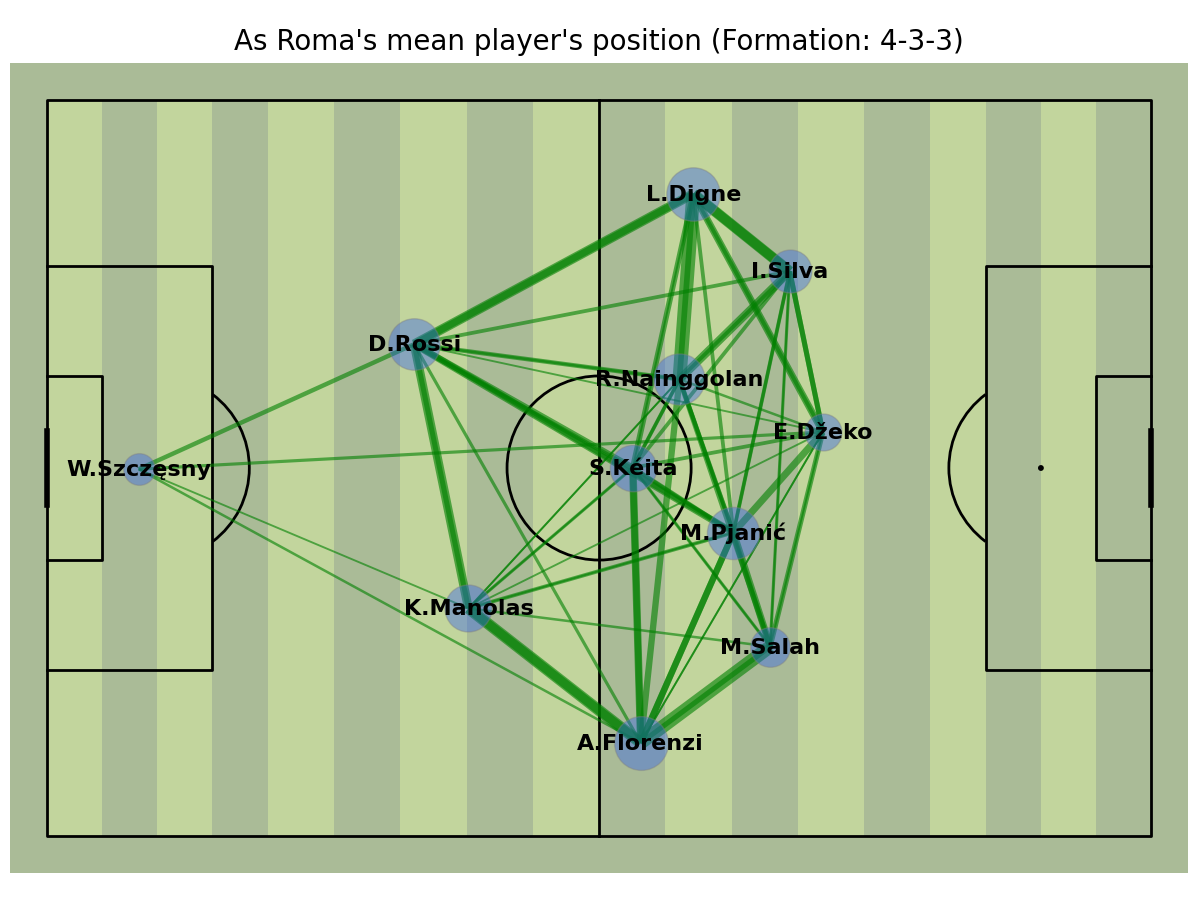

In [18]:
#Drawing pitch
pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#annotating player name
for i, row in scatter_df.iterrows():
    if row.is_starter:
        pitch.scatter(row.x, row.y, s=row.marker_size, color='#2f5fed', edgecolors='grey', linewidth=1, alpha=0.4, ax=ax["pitch"], zorder=3)
        short_name = row.player_name.split()[0][0] + "." + row.player_name.split()[-1]
        pitch.annotate(short_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

# Loop through the passes and draw lines between players who are both present in scatter_df
for i, row in linesAll_df.iterrows():
    player1 = row["pair_key"].split("_")[0]
    player2 = row['pair_key'].split("_")[1]

    if player1 != "" and player2 != "" and player1 in titolari and player2 in titolari:
        # Extract coordinates for player1
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]

        # Extract coordinates for player2
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]

        # Get the number of passes between the two players
        num_passes = row["pass_count"]

        # Adjust the line width based on the number of passes
        line_width = (num_passes / lines_df['pass_count'].max() * 10)

        # Draw the line between player1 and player2
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                    alpha=0.6, lw=line_width, zorder=2, color="green", ax=ax["pitch"])

fig.suptitle(f"As Roma's mean player's position (Formation: {modulo})", fontsize=20)
plt.show()

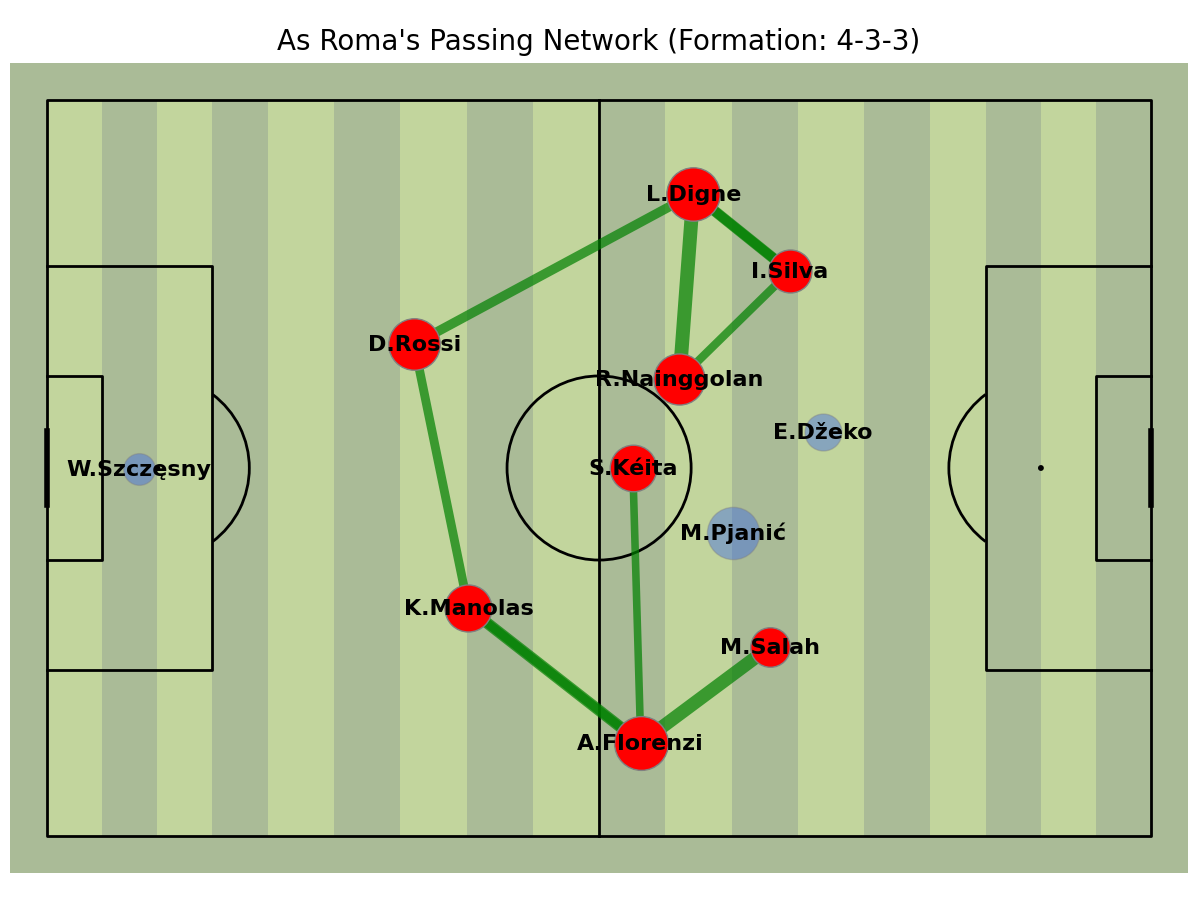

In [19]:
linesTop_df = lines_df[lines_df['pass_count']>11]
linesTop_df = linesTop_df.sort_values(by='pass_count', ascending=False)
linesTop_df

# Drawing pitch
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Annotating player name and scatter plot for titolari
# for i, row in scatter_df.iterrows():
#     # If the player is a starter, draw a special marker
#     if row.is_starter:
#         pitch.scatter(row.x, row.y, s=row.marker_size, color='#2f5fed', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder=3)
#         short_name = row.player_name.split()[0][0] + "." + row.player_name.split()[-1]
#         pitch.annotate(short_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in scatter_df.iterrows():
    if row.is_starter:
        # Check if player has a pass connection (will be red if a line is drawn later)
        if not any(linesTop_df['pair_key'].str.contains(row.player_name)):
            color = '#2f5fed'  # Default blue color if no pass connection
            a = 0.4
        else:
            color = 'red'  # Set to red if player has at least one pass connection
            a = 1
        
        pitch.scatter(row.x, row.y, s=row.marker_size, color=color, edgecolors='grey', linewidth=1, alpha=a, ax=ax["pitch"], zorder=3)
        short_name = row.player_name.split()[0][0] + "." + row.player_name.split()[-1]
        pitch.annotate(short_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight="bold", size=16, ax=ax["pitch"], zorder=4)
    

# Loop through the passes and draw lines between players who are both present in scatter_df
for i, row in linesTop_df.iterrows():
    player1 = row["pair_key"].split("_")[0]
    player2 = row['pair_key'].split("_")[1]

    if player1 != "" and player2 != "" and player1 in titolari and player2 in titolari:
        # Extract coordinates for player1
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]

        # Extract coordinates for player2
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]

        # Get the number of passes between the two players
        num_passes = row["pass_count"]

        # Adjust the line width based on the number of passes
        line_width = (num_passes / lines_df['pass_count'].max() * 10)

        # Draw the line between player1 and player2
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                    alpha=0.7, lw=line_width, zorder=2, color="green", ax=ax["pitch"])

# Set the title of the plot
fig.suptitle(f"As Roma's Passing Network (Formation: {modulo})", fontsize=20)

# Show the plot
plt.show()


In [20]:
# Filtra solo gli eventi della Roma
roma_events = match_events[match_events['team_name'] == 'AS Roma']

# Trova l'indice dell'evento che rappresenta un gol della Roma
goal_event = roma_events[roma_events['shot_outcome_name'] == 'Goal'].iloc[0]

# Trova l'indice dell'evento gol
goal_event_index = goal_event.name

# Filtra gli eventi precedenti al gol
events_before_goal = roma_events[roma_events.index <= goal_event_index]

# Seleziona gli ultimi 5 eventi
last_10_events = events_before_goal.tail(10)

last_10_events


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,dribble_outcome_id,dribble_outcome_name,pass_outcome_id,pass_outcome_name,pass_cross,pass_switch,ball_receipt_outcome_id,ball_receipt_outcome_name,off_camera,counterpress,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,out,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,clearance_body_part_id,clearance_body_part_name,clearance_right_foot,shot_first_time,pass_aerial_won,interception_outcome_id,interception_outcome_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_won_defensive,ball_recovery_recovery_failure,clearance_head,pass_miscommunication,foul_committed_card_id,foul_committed_card_name,clearance_left_foot,pass_technique_id,pass_technique_name,pass_outswinging,clearance_aerial_won,dribble_nutmeg,pass_inswinging,injury_stoppage_in_chain,foul_committed_offensive,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,block_offensive,foul_committed_type_id,foul_committed_type_name,pass_cut_back,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,shot_aerial_won,pass_goal_assist,shot_saved_off_target,goalkeeper_shot_saved_off_target,foul_committed_advantage,foul_won_advantage,dribble_overrun
2398,e9d31c65-fe11-4654-89db-eaeb0c0339d5,2399,2,00:14:15.009,59,15,117,0.000000,2,Ball Recovery,229,AS Roma,2,From Corner,229,AS Roma,NaN,NaN,NaN,"[107.9, 29.7]",6973.0,Edin Džeko,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399,8c531219-4e6f-411b-a350-5446e18f28f0,2400,2,00:14:15.009,59,15,117,1.583717,43,Carry,229,AS Roma,2,From Corner,229,AS Roma,NaN,NaN,"[54144fc2-59d6-4bcb-a77b-8392f7a8086a, e9d31c6...","[107.9, 29.7]",6973.0,Edin Džeko,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[110.3, 30.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2400,54144fc2-59d6-4bcb-a77b-8392f7a8086a,2401,2,00:14:16.593,59,16,117,0.389814,16,Shot,229,AS Roma,2,From Corner,229,AS Roma,NaN,NaN,[28e4e560-9ea1-45e5-b19a-e57717b7697b],"[110.3, 30.0]",6973.0,Edin Džeko,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124570,"[117.1, 36.4, 0.2]",NaN,87.0,Open Play,100.0,Saved,93.0,Normal,38.0,Left Foot,"[{'location': [111.7, 33.7], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2403,daaf9b58-c733-491a-a01c-397ab592803c,2404,2

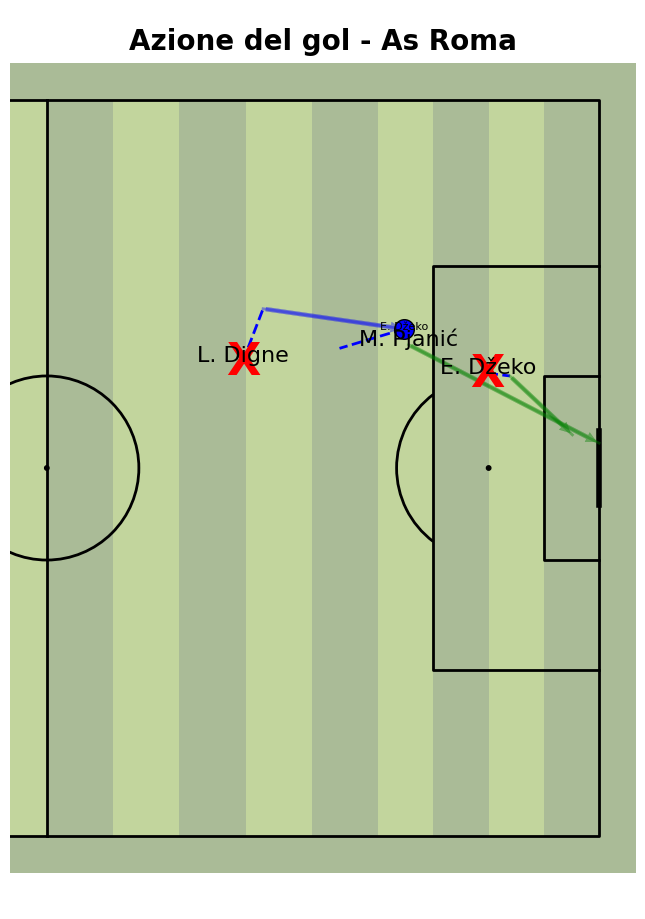

In [21]:
# Creare il campo da gioco
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True, half=True)

# Crea la figura e il campo da gioco utilizzando pitch.grid
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Variabile per tenere traccia del primo evento per ogni giocatore
first_event = {}

# Lista univoca dei giocatori
players = last_10_events['player_name'].unique()

for player in players:
    player_events = last_10_events[last_10_events['player_name'] == player]

    for index, row in player_events.iterrows():
        if row['type_name'] not in ['Carry', 'Ball Recovery', 'Pass', 'Ball Receipt*', 'Shot']:
            continue  # Salta questo evento e passa al successivo
        x = row['location'][0]
        y = row['location'][1]
        
        # Formattare il nome del giocatore: primo carattere del nome + punto + cognome intero
        player_name_formatted = f"{row['player_name'].split()[0][0]}. {row['player_name'].split()[-1]}"

        # Etichettiamo il giocatore solo al primo evento
        if player not in first_event:
            first_event[player] = True
            ax["pitch"].text(x, y, f"{player_name_formatted}", fontsize=16, ha='center', color='black', zorder=4)

        # Se l'evento è un "Ball Recovery", tracciamo una X rossa
        if row['type_name'] == 'Ball Recovery':
            ax["pitch"].text(x, y, 'X', fontsize=32, ha='center', color='red', va='center', fontweight='bold', zorder=3)

        # Se l'evento è un "Ball Receipt", disegniamo un nodo blu per il ricevimento della palla
        if row['type_name'] == 'Ball Receipt*':
            ax["pitch"].scatter(x, y, color='blue', s=200, edgecolors='black', zorder=3)  # Nodo blu per il ricevimento
            ax["pitch"].text(x, y, player_name_formatted, fontsize=8, ha='center', color='black', zorder=4)
        
        # Se l'evento è un "Carry", tracciamo una linea tratteggiata
        if row['type_name'] == 'Carry':
            x_end, y_end = row["carry_end_location"]
            ax["pitch"].plot([x, x_end], [y, y_end], color='blue', linestyle='--', lw=2, zorder=2)  # Linea tratteggiata

        if row["type_name"] == "Pass":
            x_end, y_end = row["pass_end_location"]
            ax["pitch"].plot([x, x_end], [y, y_end], color='blue', lw=2, zorder=2, alpha=0.4)
            
            # Aggiungi le frecce per ogni passaggio usando FancyArrowPatch
            arrow = FancyArrowPatch(
                (x, y), (x_end, y_end), 
                mutation_scale=15,  # Scala della freccia
                color='blue',       # Colore della freccia
                lw=0.2,             # Spessore della linea
                alpha=0.4,          # Trasparenza della freccia
                zorder=2            # Livello di sovrapposizione
            )
            ax["pitch"].add_patch(arrow)
        
        if row["type_name"] == "Shot":
            x_end = row["shot_end_location"][0]
            y_end = row["shot_end_location"][1]
            ax["pitch"].plot([x, x_end], [y, y_end], color='green', lw=2, zorder=2, alpha=0.4)
            
            # Aggiungi le frecce per ogni tiro usando FancyArrowPatch
            arrow = FancyArrowPatch(
                (x, y), (x_end, y_end), 
                mutation_scale=15,  # Scala della freccia
                color='green',      # Colore della freccia
                lw=0.2,             # Spessore della linea
                alpha=0.4,          # Trasparenza della freccia
                zorder=2            # Livello di sovrapposizione
            )
            ax["pitch"].add_patch(arrow)

# Aggiungere il titolo al grafico (per tutta la figura)
fig.suptitle('Azione del gol - As Roma', fontsize=20, fontweight='bold')

# Mostrare il grafico
plt.show()


In [22]:
# Filtra solo gli eventi della Roma
roma_events = match_events[match_events['team_name'] == 'AS Roma']

# Trova tutti gli eventi che rappresentano un gol della Roma
goal_events = roma_events[roma_events['shot_outcome_name'] == 'Goal']

# Crea un dizionario per raccogliere gli eventi precedenti a ciascun gol
events_before_goals_dict = {}

# Per ogni gol trovato, seleziona gli eventi precedenti
for goal_event in goal_events.itertuples():
    # Trova l'indice dell'evento gol
    goal_event_index = goal_event.Index
    
    # Filtra gli eventi precedenti al gol
    events_before_goal = roma_events[roma_events.index <= goal_event_index]
    
    # Seleziona gli ultimi 10 eventi precedenti
    last_10_events = events_before_goal.tail(4)
    
    # Aggiungi al dizionario con la chiave come l'indice dell'evento gol
    events_before_goals_dict[goal_event_index] = last_10_events

# Mostra il dizionario contenente gli eventi precedenti a ciascun gol
for key,value in events_before_goals_dict.items():
    print(key,value["type_name"])


2412 2407    Ball Receipt*
2408            Carry
2411         Foul Won
2412             Shot
Name: type_name, dtype: object
2811 2806            Carry
2808             Pass
2809    Ball Receipt*
2811             Shot
Name: type_name, dtype: object


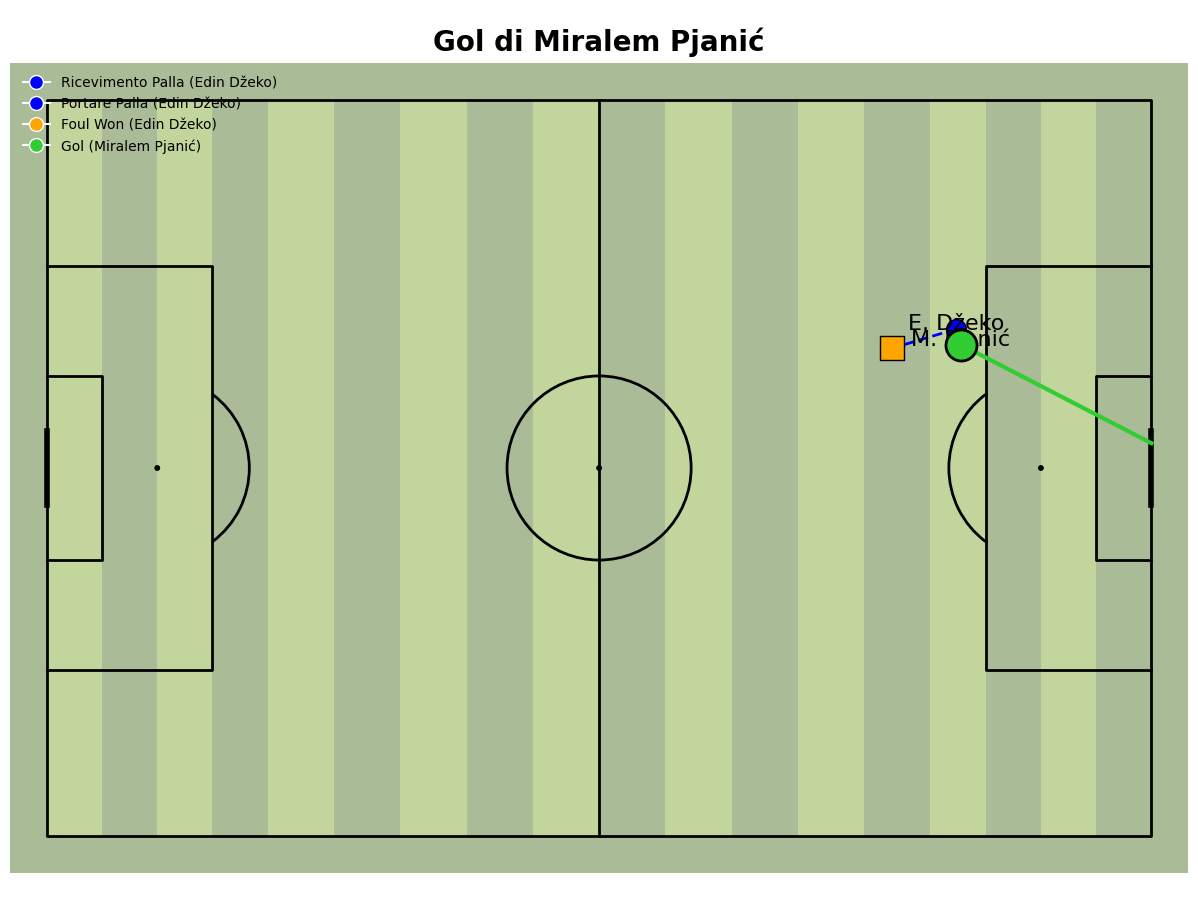

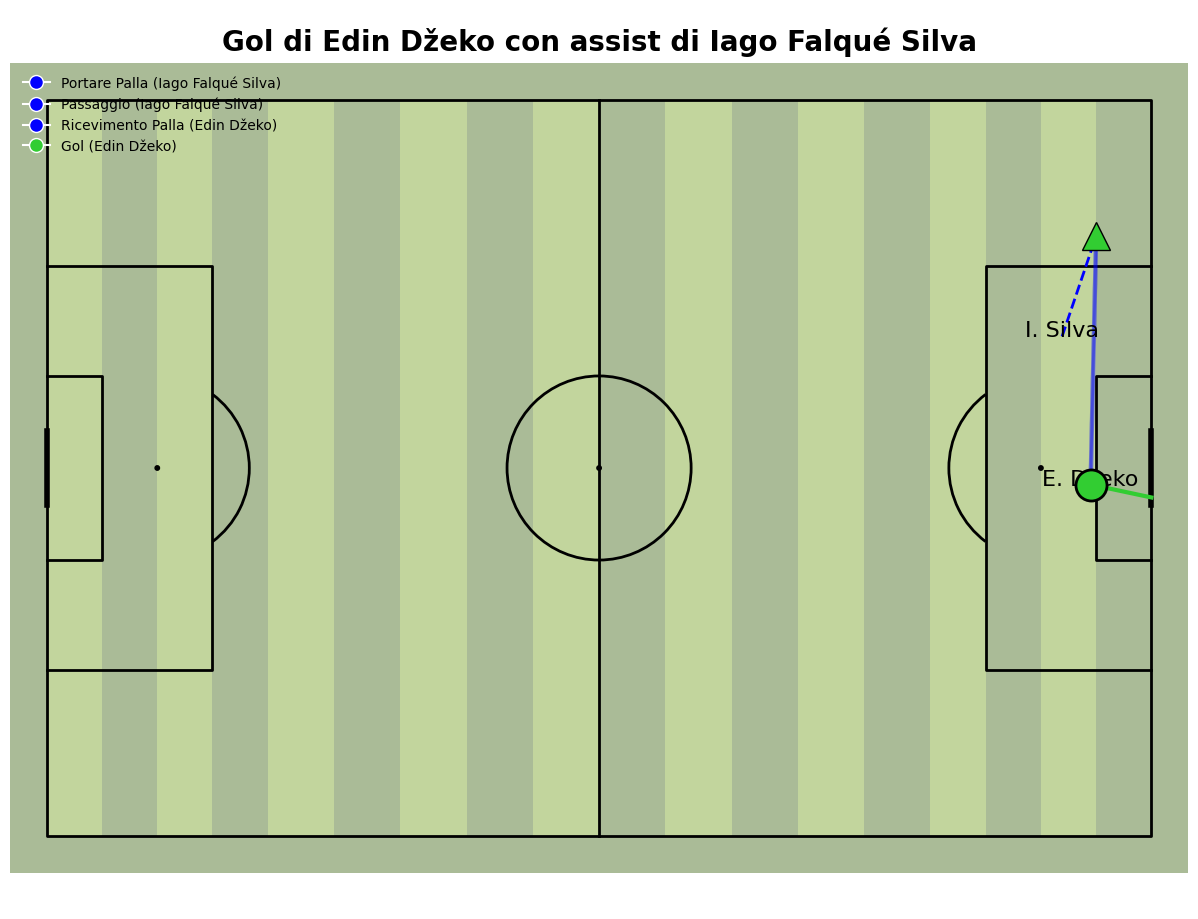

In [23]:
# Crea un grafico per ogni gol nel dizionario
for goal_event_index, events_before_goal in events_before_goals_dict.items():
    # Crea il campo da gioco
    pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True)
    
    # Crea la figura e il campo da gioco utilizzando pitch.grid
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    
    # Variabile per tenere traccia del primo evento per ogni giocatore
    first_event = {}

    # Liste per raccogliere le etichette per la legenda
    legend_elements = []

    # Lista dei giocatori coinvolti negli eventi precedenti a questo gol
    players = events_before_goal['player_name'].unique()

    # Variabili per il nome del giocatore che ha segnato e per l'assist
    goal_scorer = None
    assist_provider = None

    for player in players:
        player_events = events_before_goal[events_before_goal['player_name'] == player]
        
        for index, row in player_events.iterrows():
            if row['type_name'] not in ['Carry', 'Ball Recovery', 'Pass', 'Ball Receipt*', 'Shot', 'Foul Won']:
                continue  # Salta questo evento e passa al successivo
            x = row['location'][0]
            y = row['location'][1]

            # Formattare il nome del giocatore: primo carattere del nome + punto + cognome intero
            player_name_formatted = f"{row['player_name'].split()[0][0]}. {row['player_name'].split()[-1]}"
            
            # Etichettiamo il giocatore solo al primo evento
            if player not in first_event:
                first_event[player] = True
                ax["pitch"].text(x, y, f"{player_name_formatted}", fontsize=16, ha='center', color='black', zorder=4)

            # Se l'evento è un "Ball Recovery", tracciamo una X rossa
            if row['type_name'] == 'Ball Recovery':
                ax["pitch"].text(x, y, 'X', fontsize=32, ha='center', color='red', va='center', fontweight='bold', zorder=3)
                if ('Ball Recovery', player) not in legend_elements:
                    legend_elements.append(('Recupero Palla', player, 'red'))

            # Se l'evento è un "Ball Receipt", disegniamo un nodo blu per il ricevimento della palla
            if row['type_name'] == 'Ball Receipt*':
                ax["pitch"].scatter(x, y, color='blue', s=200, edgecolors='black', zorder=3)  # Nodo blu per il ricevimento
                if ('Ball Receipt*', player) not in legend_elements:
                    legend_elements.append(('Ricevimento Palla', player, 'blue'))
            
            # Se l'evento è un "Carry", tracciamo una linea tratteggiata
            if row['type_name'] == 'Carry':
                x_end, y_end = row["carry_end_location"]
                ax["pitch"].plot([x, x_end], [y, y_end], color='blue', linestyle='--', lw=2, zorder=2)  # Linea tratteggiata
                if ('Carry', player) not in legend_elements:
                    legend_elements.append(('Portare Palla', player, 'blue'))

            if row["type_name"] == "Pass":
                x_end, y_end = row["pass_end_location"]
                ax["pitch"].plot([x, x_end], [y, y_end], color='blue', lw=2, zorder=2, alpha=0.4)

                # Aggiungi le frecce per ogni passaggio usando FancyArrowPatch
                arrow = FancyArrowPatch(
                    (x, y), (x_end, y_end), 
                    mutation_scale=15,  # Scala della freccia
                    color='blue',       # Colore della freccia
                    lw=0.2,             # Spessore della linea
                    alpha=0.4,          # Trasparenza della freccia
                    zorder=2            # Livello di sovrapposizione
                )
                ax["pitch"].add_patch(arrow)
                
                # Controlla se il passaggio è stato un assist
                if row.get("pass_goal_assist", False):  # Verifica se il passaggio è un assist
                    assist_provider = row['player_name']  # Memorizza il nome del giocatore che ha fatto l'assist
                    # Disegnare il triangolo verde per l'assist
                    ax["pitch"].plot(x, y, marker='^', markersize=20, color='limegreen', markeredgecolor='black', zorder=3)
                    
                if ('Passaggio', player) not in legend_elements:
                    legend_elements.append(('Passaggio', player, 'blue'))
            
            # Se l'evento è un "Foul Won", disegniamo un quadrato arancione
            if row["type_name"] == "Foul Won":
                ax["pitch"].scatter(x, y, color='orange', s=300, edgecolors='black', marker='s', zorder=3)  # Quadrato arancione
                if ('Foul Won', player) not in legend_elements:
                    legend_elements.append(('Foul Won', player, 'orange'))

            if row["type_name"] == "Shot":
                # Ottieni la posizione finale del tiro
                x_end = row["shot_end_location"][0]
                y_end = row["shot_end_location"][1]

                # Verifica se il tiro è stato un gol
                if row["shot_outcome_name"] == "Goal":
                    goal_scorer = row['player_name']  # Memorizza il nome del giocatore che ha segnato
                    shot_color = 'limegreen'  # Colore per il gol
                    # Disegnare la linea del tiro (limegreen per il gol)
                    ax["pitch"].plot([x, x_end], [y, y_end], color=shot_color, linestyle='-', linewidth=3, zorder=3)

                    # Cerchio luminoso per il gol
                    ax["pitch"].scatter(x, y, color=shot_color, s=500, edgecolors='black', linewidth=2, zorder=4)

                    # Aggiungere l'evento al dizionario per la legenda
                    if ('Gol', player) not in legend_elements:
                        legend_elements.append(('Gol', player, shot_color))
                
                else:
                    shot_color = 'green'  # Colore per i tiri non riusciti

                    # Disegnare la linea del tiro (verde normale per un tiro non riuscito)
                    ax["pitch"].plot([x, x_end], [y, y_end], color=shot_color, linestyle='-', linewidth=2, zorder=2)

                    # Cerchio per il tiro non riuscito
                    ax["pitch"].scatter(x, y, color=shot_color, s=300, edgecolors='black', linewidth=2, zorder=3)

                    # Aggiungere l'evento al dizionario per la legenda
                    if ('Tiro non riuscito', player) not in legend_elements:
                        legend_elements.append(('Tiro non riuscito', player, shot_color))

    # Aggiungere il titolo al grafico
    if goal_scorer:
        title = f"Gol di {goal_scorer}"
        if assist_provider:
            title += f" con assist di {assist_provider}"
    else:
        title = f"Gol - Indice evento {goal_event_index}"

    fig.suptitle(title, fontsize=20, fontweight='bold')

    # Aggiungere la legenda
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for _, _, color in legend_elements]
    labels = [f"{evento} ({giocatore})" for evento, giocatore, _ in legend_elements]
    ax["pitch"].legend(handles=handles, labels=labels, loc='upper left', fontsize=10, frameon=False)

    # Mostrare il grafico
    plt.show()


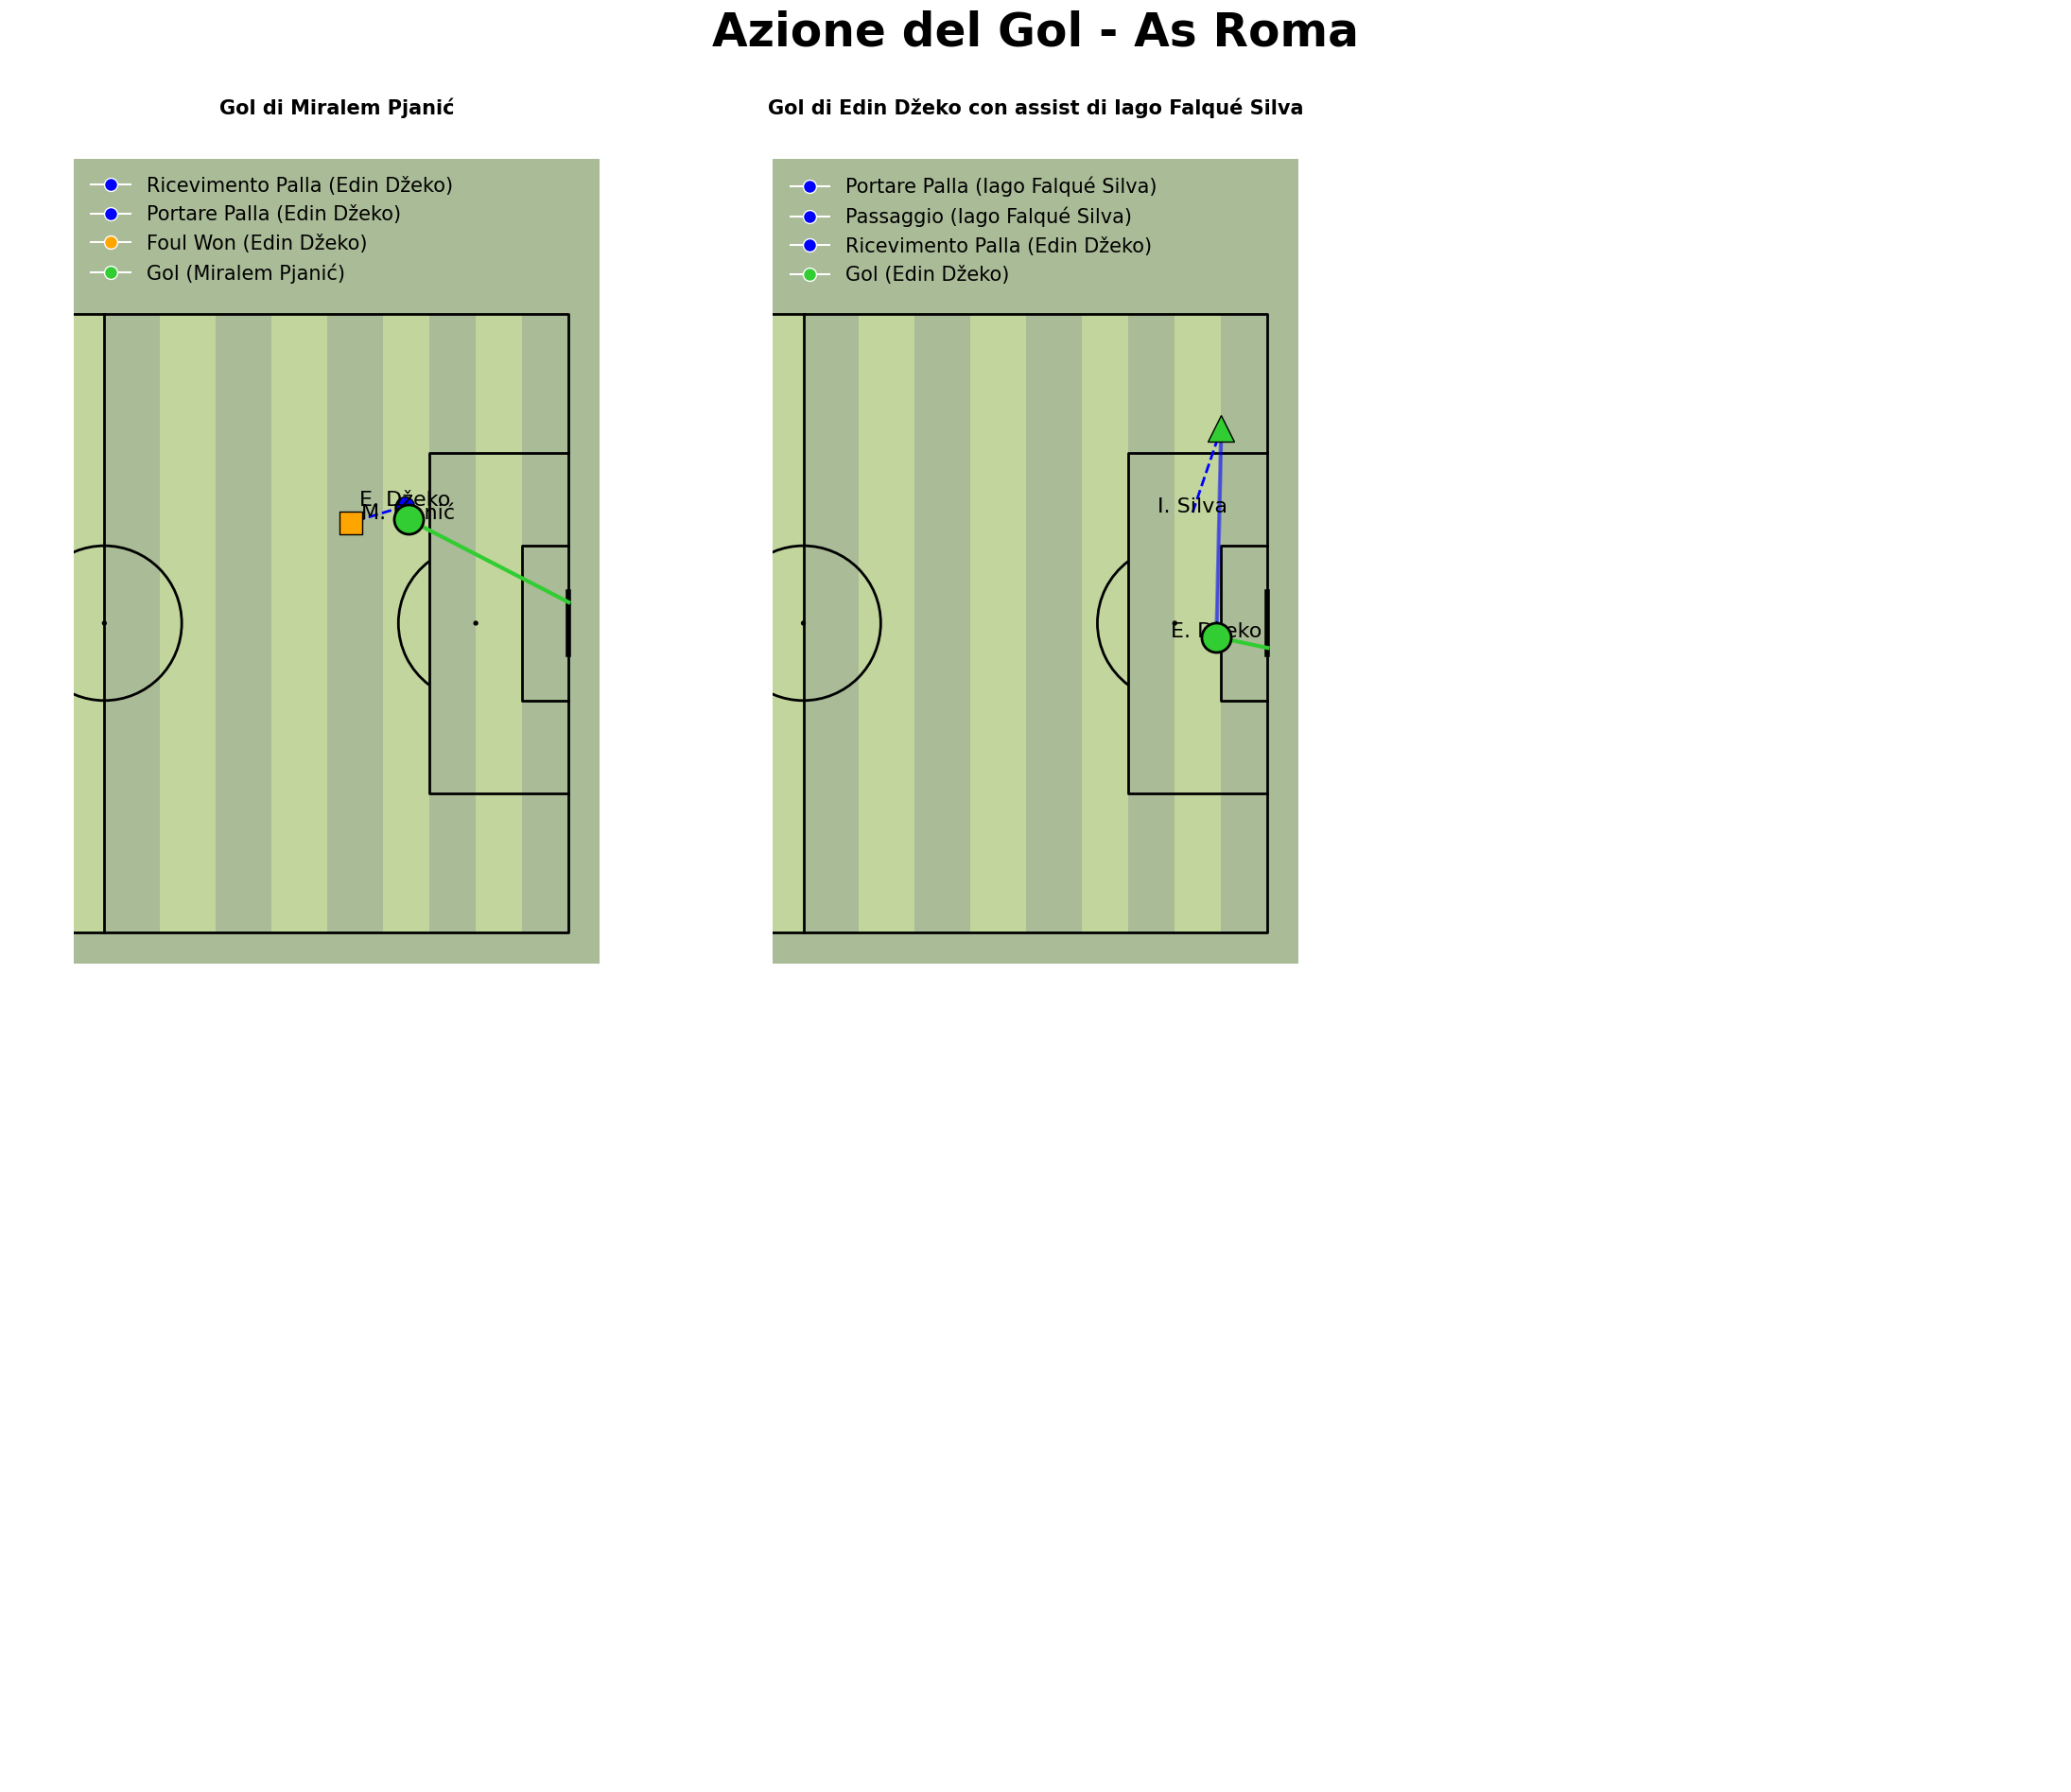

In [24]:
# Crea una figura con 16 sottotrame (4x4)
fig, axs = plt.subplots(figsize=(22, 18), nrows=2, ncols=3)

# Imposta il layout della figura
axs = axs.flatten()  # Rende più facile indicizzare le sottotrame

# Elenco dei passaggi considerati "sbagliati"
invalid_pass_outcomes = ["Incomplete", "Out", "Unknown", "Pass Offside", "Injury Clearance"]

# Variabile per limitare il numero di gol (max 6)
goal_counter = 0

# Crea il grafico per ogni gol nel dizionario
for goal_event_index, events_before_goal in events_before_goals_dict.items():
    # Prendi l'indice della sottotrama
    ax = axs[goal_counter]  # Ogni gol avrà una sottotrama separata

    # Crea il campo da gioco
    pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', half=True, stripe=True, pad_top=20, pitch_length=140, pitch_width=100)
    pitch.draw(ax=ax)

    # Variabili per il nome del giocatore che ha segnato e per l'assist
    goal_scorer = None
    assist_provider = None

    # Variabile per tenere traccia del primo evento per ogni giocatore
    first_event = {}

    # Liste per raccogliere le etichette per la legenda
    legend_elements = []

    # Lista dei giocatori coinvolti negli eventi precedenti a questo gol
    players = events_before_goal['player_name'].unique()

    for player in players:
        player_events = events_before_goal[events_before_goal['player_name'] == player]

        # Estrai gli eventi del gol e disegna le azioni
        for index, row in player_events.iterrows():
            x = row['location'][0]
            y = row['location'][1]

            # Formattare il nome del giocatore: primo carattere del nome + punto + cognome intero
            player_name_formatted = f"{row['player_name'].split()[0][0]}. {row['player_name'].split()[-1]}"
            
            # Etichettiamo il giocatore solo al primo evento
            if player not in first_event:
                first_event[player] = True
                ax.text(x, y, f"{player_name_formatted}", fontsize=16, ha='center', color='black', zorder=4)

            # Se l'evento è un "Ball Recovery", tracciamo una X rossa
            if row['type_name'] == 'Ball Recovery':
                ax.text(x, y, 'X', fontsize=32, ha='center', color='red', va='center', fontweight='bold', zorder=3)
                if ('Ball Recovery', player) not in legend_elements:
                    legend_elements.append(('Recupero Palla', player, 'red'))

            # Se l'evento è un "Ball Receipt", disegniamo un nodo blu per il ricevimento della palla
            if row['type_name'] == 'Ball Receipt*':
                ax.scatter(x, y, color='blue', s=200, edgecolors='black', zorder=3)  # Nodo blu per il ricevimento
                if ('Ball Receipt*', player) not in legend_elements:
                    legend_elements.append(('Ricevimento Palla', player, 'blue'))
            
            # Se l'evento è un "Carry", tracciamo una linea tratteggiata
            if row['type_name'] == 'Carry':
                x_end, y_end = row["carry_end_location"]
                ax.plot([x, x_end], [y, y_end], color='blue', linestyle='--', lw=2, zorder=2)  # Linea tratteggiata
                if ('Carry', player) not in legend_elements:
                    legend_elements.append(('Portare Palla', player, 'blue'))

            if row["type_name"] == "Pass":
                x_end, y_end = row["pass_end_location"]
                ax.plot([x, x_end], [y, y_end], color='blue', lw=2, zorder=2, alpha=0.4)

                # Aggiungi le frecce per ogni passaggio usando FancyArrowPatch
                arrow = FancyArrowPatch(
                    (x, y), (x_end, y_end), 
                    mutation_scale=15,  # Scala della freccia
                    color='blue',       # Colore della freccia
                    lw=0.2,             # Spessore della linea
                    alpha=0.4,          # Trasparenza della freccia
                    zorder=2            # Livello di sovrapposizione
                )
                ax.add_patch(arrow)
                
                # Controlla se il passaggio è stato un assist
                if row.get("pass_goal_assist", False):  # Verifica se il passaggio è un assist
                    assist_provider = row['player_name']  # Memorizza il nome del giocatore che ha fatto l'assist
                    # Disegnare il triangolo verde per l'assist
                    ax.plot(x, y, marker='^', markersize=20, color='limegreen', markeredgecolor='black', zorder=3)
                    
                if ('Passaggio', player) not in legend_elements:
                    legend_elements.append(('Passaggio', player, 'blue'))
            
            # Se l'evento è un "Foul Won", disegniamo un quadrato arancione
            if row["type_name"] == "Foul Won":
                ax.scatter(x, y, color='orange', s=300, edgecolors='black', marker='s', zorder=3)  # Quadrato arancione
                if ('Foul Won', player) not in legend_elements:
                    legend_elements.append(('Foul Won', player, 'orange'))

            if row["type_name"] == "Shot":
                # Ottieni la posizione finale del tiro
                x_end = row["shot_end_location"][0]
                y_end = row["shot_end_location"][1]

                # Verifica se il tiro è stato un gol
                if row["shot_outcome_name"] == "Goal":
                    goal_scorer = row['player_name']  # Memorizza il nome del giocatore che ha segnato
                    shot_color = 'limegreen'  # Colore per il gol
                    # Disegnare la linea del tiro (limegreen per il gol)
                    ax.plot([x, x_end], [y, y_end], color=shot_color, linestyle='-', linewidth=3, zorder=3)

                    # Cerchio luminoso per il gol
                    ax.scatter(x, y, color=shot_color, s=500, edgecolors='black', linewidth=2, zorder=4)

                    # Aggiungere l'evento al dizionario per la legenda
                    if ('Gol', player) not in legend_elements:
                        legend_elements.append(('Gol', player, shot_color))
                
                else:
                    shot_color = 'green'  # Colore per i tiri non riusciti

                    # Disegnare la linea del tiro (verde normale per un tiro non riuscito)
                    ax.plot([x, x_end], [y, y_end], color=shot_color, linestyle='-', linewidth=2, zorder=2)

                    # Cerchio per il tiro non riuscito
                    ax.scatter(x, y, color=shot_color, s=300, edgecolors='black', linewidth=2, zorder=3)

                    # Aggiungere l'evento al dizionario per la legenda
                    if ('Tiro non riuscito', player) not in legend_elements:
                        legend_elements.append(('Tiro non riuscito', player, shot_color))

    # Aggiungere il nome del giocatore che ha segnato e il fornitore dell'assist (se presente)
    title = f"Gol di {goal_scorer}"
    if assist_provider:
        title += f" con assist di {assist_provider}"

    ax.text(0.5, 1.05, title, ha='center', va='bottom', fontsize=15, fontweight='bold', transform=ax.transAxes)

    # Aggiungere la legenda
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for _, _, color in legend_elements]
    labels = [f"{evento} ({giocatore})" for evento, giocatore, _ in legend_elements]
    ax.legend(handles=handles, labels=labels, loc='upper left', fontsize=15, frameon=False)

    goal_counter += 1  # Incrementa il contatore per i gol

# Nascondi gli assi non utilizzati
for j in range(goal_counter, len(axs)):
    axs[j].axis('off')  # Disabilita gli assi per le sottotrame non utilizzate

# Aggiungi il titolo all'intera figura
fig.text(0.5, 1.05, "Azione del Gol - As Roma", ha='center', va='top', fontsize=35, fontweight='bold')

plt.tight_layout()
plt.show()


In [25]:
# Filtra solo gli eventi della Roma
roma_events = match_events[match_events['team_name'] == 'AS Roma']

# Trova tutti gli eventi che rappresentano un gol della Roma
goal_events = roma_events[roma_events['shot_outcome_name'] == 'Goal']
goal_events

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,dribble_outcome_id,dribble_outcome_name,pass_outcome_id,pass_outcome_name,pass_cross,pass_switch,ball_receipt_outcome_id,ball_receipt_outcome_name,off_camera,counterpress,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,out,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,clearance_body_part_id,clearance_body_part_name,clearance_right_foot,shot_first_time,pass_aerial_won,interception_outcome_id,interception_outcome_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_won_defensive,ball_recovery_recovery_failure,clearance_head,pass_miscommunication,foul_committed_card_id,foul_committed_card_name,clearance_left_foot,pass_technique_id,pass_technique_name,pass_outswinging,clearance_aerial_won,dribble_nutmeg,pass_inswinging,injury_stoppage_in_chain,foul_committed_offensive,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,block_offensive,foul_committed_type_id,foul_committed_type_name,pass_cut_back,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,shot_aerial_won,pass_goal_assist,shot_saved_off_target,goalkeeper_shot_saved_off_target,foul_committed_advantage,foul_won_advantage,dribble_overrun
2412,9d2b8b85-ff6f-481c-82bc-a3fe885c2d37,2413,2,00:15:50.060,60,50,118,1.023492,16,Shot,229,AS Roma,3,From Free Kick,229,AS Roma,NaN,NaN,[22b5a846-267d-41bb-84da-b9fde7a5148c],"[99.3, 26.6]",6947.0,Miralem Pjanić,13.0,Right Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060908,"[120.0, 37.3, 1.8]",NaN,62.0,Free Kick,97.0,Goal,93.0,Normal,40.0,Right Foot,"[{'location': [107.2, 32.9], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2811,971e34ba-ab5f-4830-93c6-994ae3c90794,2812,2,00:33:22.801,78,22,147,1.008580,16,Shot,229,AS Roma,3,From Free Kick,229,AS Roma,NaN,NaN,"[5a469f5b-dc56-461e-8860-07c4ad4192fc, e5f055a...","[113.4, 41.8]",6973.0,Edin Džeko,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.210571,"[120.0, 43.2, 0.7]",7147c661-0f33-49d4-8535-b7c83fb8256b,87.0,Open Play,97.0,Goal,93.0,Normal,37.0,Head,"[{'location': [116.2, 16.9], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
positions_per_player = match_events[match_events["team_name"] == asroma].groupby("player_name")["position_name"].unique()
positions_per_player

player_name
Adem Ljajić                                       [Left Wing]
Alessandro Florenzi                              [Right Back]
Daniele De Rossi                           [Left Center Back]
Edin Džeko                                   [Center Forward]
Iago Falqué Silva                                 [Left Wing]
Juan Manuel Iturbe Arévalo                       [Right Wing]
Konstantinos Manolas                      [Right Center Back]
Lucas Digne                                       [Left Back]
Miralem Pjanić                        [Right Center Midfield]
Mohamed Salah                                    [Right Wing]
Radja Nainggolan                       [Left Center Midfield]
Segundo Víctor Ibarbo Guerrero               [Center Forward]
Seydou Kéita                      [Center Defensive Midfield]
Wojciech Szczęsny                                [Goalkeeper]
Name: position_name, dtype: object